In [1]:
%matplotlib inline
from pylab import *

In [2]:
from classy import *

Version:  0.0.31


In [3]:
data=load_excel('data/iris.xls')

iris.data 151 5
150 vectors of length 4
Feature names: 'petal length in cm', 'petal width in cm', 'sepal length in cm', 'sepal width in cm'
Target values given.
Target names: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
Mean:  [3.75866667 1.19866667 5.84333333 3.054     ]
Median:  [4.35 1.3  5.8  3.  ]
Stddev:  [1.75852918 0.76061262 0.82530129 0.43214658]


In [4]:
plot2D(data)

AssertionError: Function only works for 2D data.

In [ ]:
subset=extract_features(data,[0,1])
plot2D(subset)

In [8]:
data_train,data_test=split(data,test_size=0.2)

Original vector shape:  (150, 4)
Train vector shape:  (120, 4)
Test vector shape:  (30, 4)


In [9]:
C=NaiveBayes()

In [10]:
C.fit(data_train.vectors,data_train.targets)

In [11]:
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 95.0
On Test Set: 100.0


In [12]:
C=kNearestNeighbor()

In [13]:
C.fit(data_train.vectors,data_train.targets)

kNearestNeighbor()

In [14]:
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 95.83333333333334
On Test Set: 96.66666666666667


## Images

In [59]:
images=image.load_images('images/all_pieces/')

[red]: 192 files found
[white]: 128 files found
[black]: 192 files found


In [60]:
data=image.images_to_vectors(images)

512 vectors of length 15048
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p15043', 'p15044', 'p15045', 'p15046', 'p15047'  (15048 features)
Target values given.
Target names: 'red', 'white', 'black'
Mean:  [129.1875    136.5234375 130.4375    ... 136.5234375 130.4375
 255.       ]
Median:  [175.5 184.  174.  ... 184.  174.  255. ]
Stddev:  [67.94258836 67.75472364 65.81324192 ... 67.75472364 65.81324192
  0.        ]


In [61]:
data_train,data_test=split(data,test_size=0.2)

Original vector shape:  (512, 15048)
Train vector shape:  (409, 15048)
Test vector shape:  (103, 15048)


In [62]:
C=NaiveBayes()
C.fit(data_train.vectors,data_train.targets)
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 100.0
On Test Set: 100.0


In [63]:
C=kNearestNeighbor()
C.fit(data_train.vectors,data_train.targets)
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 97.79951100244499
On Test Set: 82.52427184466019


## Predict

In [64]:
test_square=image.load_images('images/square example.png')

[None]: 1 files found


In [65]:
test_data=image.images_to_vectors(test_square)

1 vectors of length 15048
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p15043', 'p15044', 'p15045', 'p15046', 'p15047'  (15048 features)
No Target values.
Target names: [None]
Mean:  [ 53.  71.  71. ...  53.  46. 255.]
Median:  [ 53.  71.  71. ...  53.  46. 255.]
Stddev:  [0. 0. 0. ... 0. 0. 0.]


In [66]:
predictions=C.predict(test_data.vectors)
category=images.target_names[predictions[0]]
print(category)

red


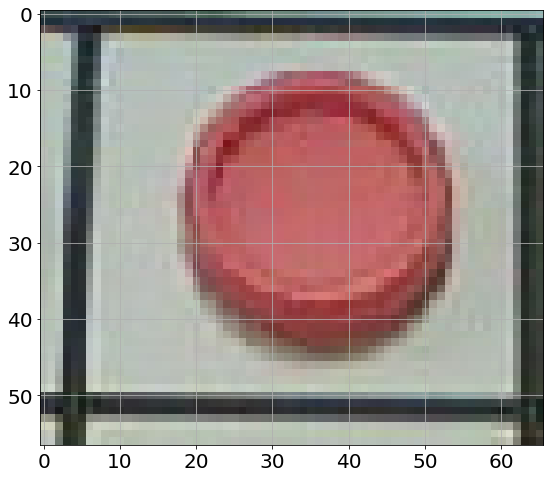

In [69]:
imshow(test_square.data[0])

## visualize

In [20]:
C=NaiveBayes()
C.fit(data_train.vectors,data_train.targets)

In [21]:
C.means

array([[130.90909091, 141.09090909, 135.62987013, ..., 141.90909091,
        136.68181818, 255.        ],
       [123.79166667, 131.98958333, 121.90625   , ..., 129.83333333,
        120.25      , 255.        ],
       [132.89937107, 137.20125786, 132.66666667, ..., 139.65408805,
        134.99371069, 255.        ]])

In [22]:
C.means.shape

(3, 15048)

In [23]:
mean0=C.means[0,:]

In [24]:
mean0.shape

(15048,)

In [25]:
im0=mean0.reshape((57,66,4))

In [26]:
im0.shape

(57, 66, 4)

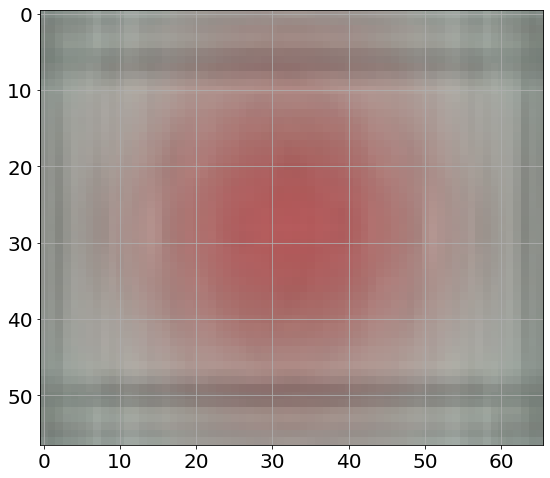

In [27]:
imshow(im0/im0.max())

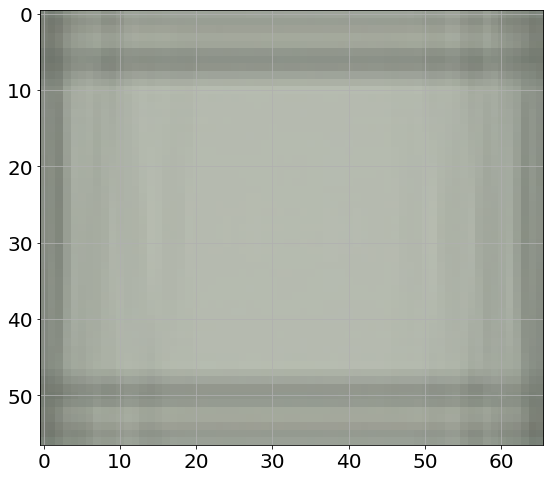

In [28]:
mean1=C.means[1,:]
im1=mean1.reshape((57,66,4))
im1=im1/im1.max()
imshow(im1)

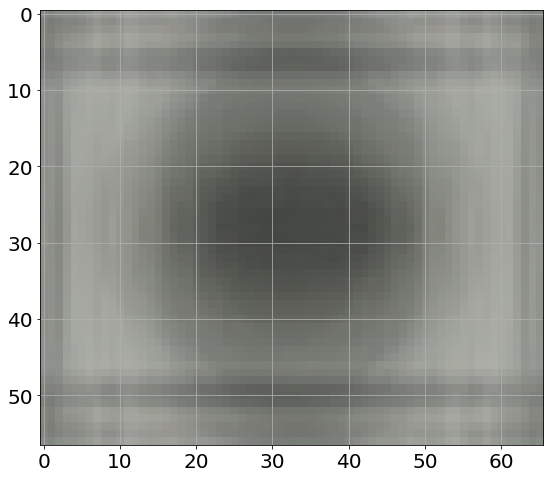

In [29]:
mean1=C.means[2,:]
im1=mean1.reshape((57,66,4))
im1=im1/im1.max()
imshow(im1)